## IMPORT MODULES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
data=pd.read_csv('water_quality_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681,1
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064,0
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317,0
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340,0
...,...,...,...,...,...,...,...,...,...,...
9995,7.020971,195.918303,21485.847739,7.019282,332.814656,430.637117,14.470552,67.697333,3.912803,0
9996,7.238648,195.613341,21565.440906,7.095263,332.829069,426.360715,14.267106,65.859665,3.978627,0
9997,7.073473,194.461197,21951.368744,7.077604,335.432478,419.875824,14.306482,64.515396,4.015702,0
9998,6.846060,177.829127,16515.670391,6.147210,308.901696,542.997099,12.626474,60.900254,4.709374,0


In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681,1
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064,0
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786,0
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317,0
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340,0


In [7]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
9995,7.020971,195.918303,21485.847739,7.019282,332.814656,430.637117,14.470552,67.697333,3.912803,0
9996,7.238648,195.613341,21565.440906,7.095263,332.829069,426.360715,14.267106,65.859665,3.978627,0
9997,7.073473,194.461197,21951.368744,7.077604,335.432478,419.875824,14.306482,64.515396,4.015702,0
9998,6.846060,177.829127,16515.670391,6.147210,308.901696,542.997099,12.626474,60.900254,4.709374,0
9999,7.133203,199.666276,22417.958216,7.192464,333.422721,416.798803,14.307727,66.548909,3.973113,1


In [8]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.091423,196.028208,21984.910331,7.135162,333.063156,426.360604,14.339111,66.465396,3.972793,0.500000
std,0.706589,14.636373,3895.384413,0.710279,18.513111,36.080914,1.484742,7.182162,0.350731,0.500025
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,7.022816,194.609577,21458.018822,7.057332,331.124701,422.515794,14.188197,65.750893,3.935476,0.000000
50%,7.093586,196.057913,21977.488628,7.133492,333.098363,426.246982,14.335375,66.469224,3.973391,0.500000
75%,7.161077,197.460684,22503.494592,7.215818,334.943071,429.921153,14.483844,67.200320,4.010571,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,708.226364,27.006707,124.000000,6.494749,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               10000 non-null  float64
 1   Hardness         10000 non-null  float64
 2   Solids           10000 non-null  float64
 3   Chloramines      10000 non-null  float64
 4   Sulfate          10000 non-null  float64
 5   Conductivity     10000 non-null  float64
 6   Organic_carbon   10000 non-null  float64
 7   Trihalomethanes  10000 non-null  float64
 8   Turbidity        10000 non-null  float64
 9   Potability       10000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


In [10]:
data.shape

(10000, 10)

In [11]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## VISUALISATION

Text(0.5, 1.0, 'Scatterplot')

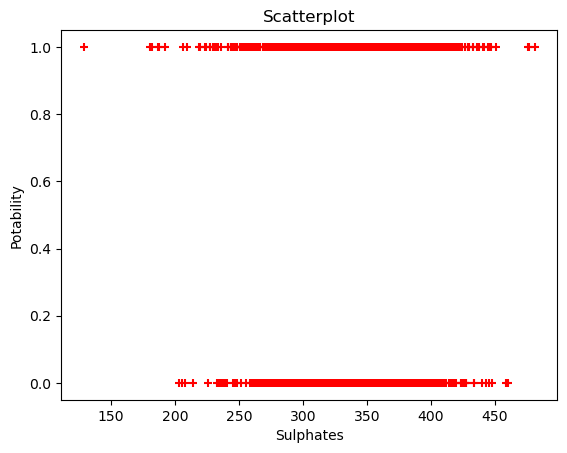

In [12]:
plt.scatter(data['Sulfate'],data['Potability'],marker='+',c='red')
plt.xlabel('Sulphates')
plt.ylabel('Potability')
plt.title('Scatterplot')

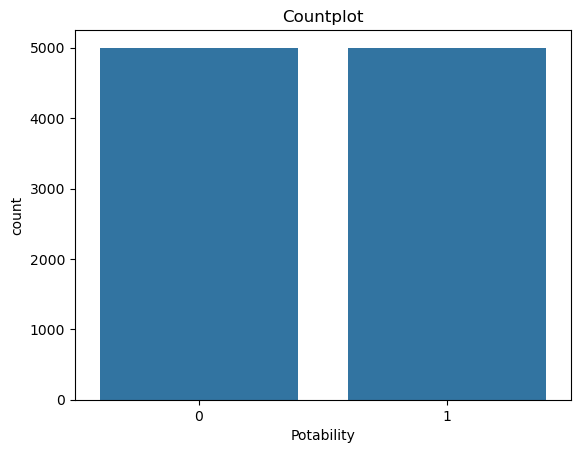

In [13]:
# Countplot

sns.countplot(x='Potability',data=data)
plt.title('Countplot')
plt.show()

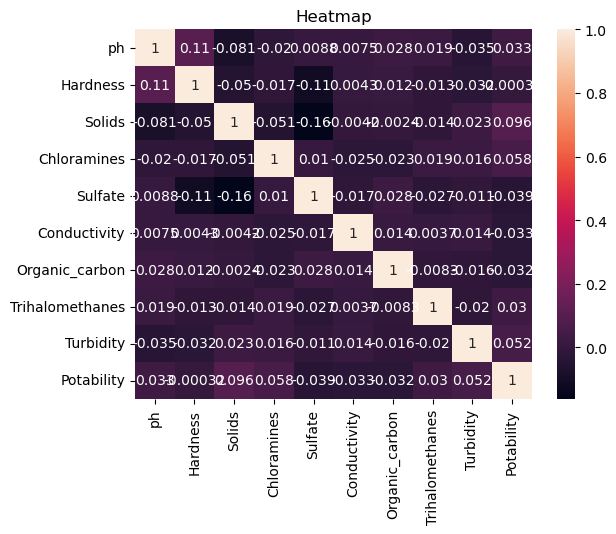

In [14]:
# Heatmap
sns.heatmap(data.select_dtypes('number').corr(),annot=True)          ## annot for values
plt.title('Heatmap')
plt.show()

In [15]:
x=data.drop('Potability',axis=1)
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.160466,195.712338,22636.785632,7.235746,336.794067,424.396711,14.376178,68.105888,3.991681
1,7.187738,193.202237,21263.028076,7.117409,333.997161,430.163405,14.206928,64.807703,3.957064
2,5.400302,140.739062,17266.593422,10.056852,328.358241,472.874073,11.256381,56.931906,4.824786
3,7.078913,196.886558,21539.185679,7.104867,335.223406,429.400333,14.344261,65.289765,3.909317
4,7.052283,194.971523,21659.468727,7.101790,335.669903,425.620822,14.100794,66.178504,3.989340
...,...,...,...,...,...,...,...,...,...
9995,7.020971,195.918303,21485.847739,7.019282,332.814656,430.637117,14.470552,67.697333,3.912803
9996,7.238648,195.613341,21565.440906,7.095263,332.829069,426.360715,14.267106,65.859665,3.978627
9997,7.073473,194.461197,21951.368744,7.077604,335.432478,419.875824,14.306482,64.515396,4.015702
9998,6.846060,177.829127,16515.670391,6.147210,308.901696,542.997099,12.626474,60.900254,4.709374


In [16]:
y=data.Potability
y

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: Potability, Length: 10000, dtype: int64

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
xtrain.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
9254,7.110136,196.466417,21457.375110,7.043593,332.708660,424.101138,14.149187,64.963569,3.876427
1561,7.148246,197.298914,21858.841342,7.120027,333.748768,433.973962,14.918414,67.086981,3.917958
1670,7.053507,195.558330,20899.413847,7.254903,331.801036,420.751246,14.201423,66.237786,3.953747
6087,7.036812,197.365030,21710.353386,7.237635,333.653282,429.680106,14.425635,65.333270,3.981353
6669,7.129484,195.088344,22152.404598,7.182694,333.535684,424.296021,14.141474,67.001862,3.927997


In [19]:
ytrain.head()

9254    0
1561    0
1670    0
6087    0
6669    1
Name: Potability, dtype: int64

## MODEL CREATION

### LOGISTIC REGRESSION

In [20]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [21]:
LG_ypred=model.predict(xtest)

model.score(xtest,ytest)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report

In [23]:
accuracy=accuracy_score(ytest,LG_ypred)
accuracy

0.811

In [24]:
precision=precision_score(ytest,LG_ypred)
precision

0.8037475345167653

In [25]:
cm=confusion_matrix(ytest,LG_ypred)
cm

array([[807, 199],
       [179, 815]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix : Logistic Regression')

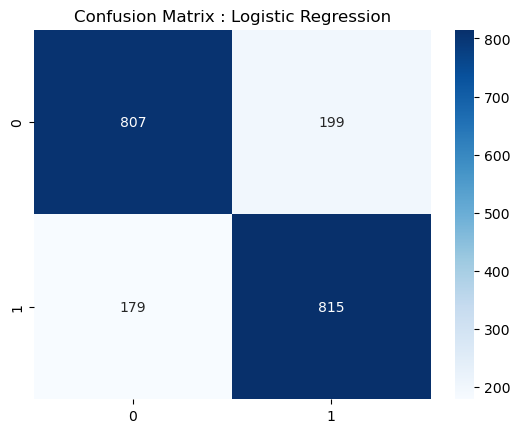

In [26]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix : Logistic Regression')

In [27]:
report=classification_report(ytest,LG_ypred)
print('\nLOGISTIC REGRESSION \n\nClassification Report:\n')
print(report)


LOGISTIC REGRESSION 

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1006
           1       0.80      0.82      0.81       994

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000



### DECISIONTREE CLASSIFIER

In [28]:
model1=DecisionTreeClassifier()
model1.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [29]:
DT_ypred=model1.predict(xtest)

In [30]:
model1.score(xtest,ytest)

0.767

In [31]:
accuracy=accuracy_score(ytest,DT_ypred)
accuracy

0.767

In [32]:
precision=precision_score(ytest,DT_ypred)
precision

0.7634730538922155

In [33]:
cm1=confusion_matrix(ytest,DT_ypred)
cm1

array([[769, 237],
       [229, 765]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix : DecisionTree Classifier')

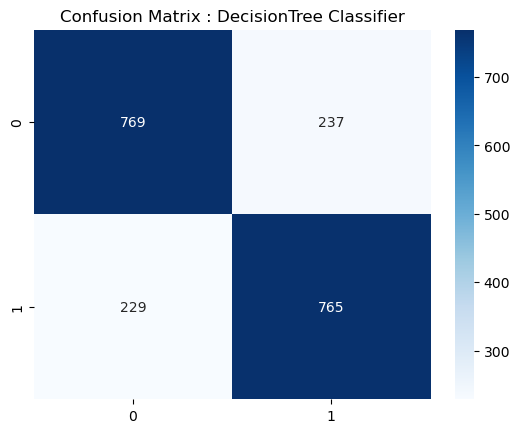

In [34]:
sns.heatmap(cm1,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix : DecisionTree Classifier')

In [35]:
report=classification_report(ytest,DT_ypred)
print('\nDECISIONTREE CLASSIFIER \n\nClassification Report:\n')
print(report)


DECISIONTREE CLASSIFIER 

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1006
           1       0.76      0.77      0.77       994

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



### RANDOMFOREST CLASSIFIER

In [36]:
model2=RandomForestClassifier(n_estimators=10)
model2.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [37]:
RF_ypred=model2.predict(xtest)

In [38]:
model2.score(xtest,ytest)

0.829

In [39]:
accuracy=accuracy_score(ytest,RF_ypred)
accuracy

0.829

In [40]:
precision=precision_score(ytest,RF_ypred)
precision

0.8598233995584988

In [41]:
cm2=confusion_matrix(ytest,RF_ypred)
cm2

array([[879, 127],
       [215, 779]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix : RandomForest Classifier')

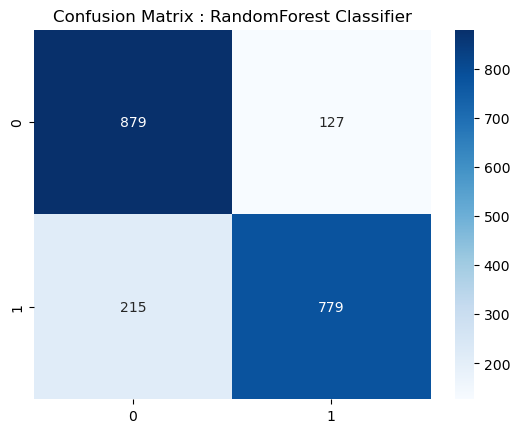

In [42]:
sns.heatmap(cm2,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix : RandomForest Classifier')

In [43]:
report=classification_report(ytest,RF_ypred)
print('\nRANDOMFOREST CLASSIFIER \n\nClassification Report:\n')
print(report)


RANDOMFOREST CLASSIFIER 

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1006
           1       0.86      0.78      0.82       994

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



### PREDICTION SYSTEM

In [ ]:
import numpy as np

# Sample input data (ordered as per your model’s expected features)
# Format: (ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity)
input_data = (8.160458,186.548624,30254.524862,6.235546,300.346187,384.524855,15.376178,63.125485,4.578621)

# Convert input data to a numpy array
input_data_as_numpy_array = np.array(input_data)

# Reshape the data as we're predicting for one instance
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Make prediction using your trained model
prediction = model.predict(input_data_reshape)

print("Water Potability:" ,prediction[0])

In [ ]:
# save to pickle file
import pickle

In [ ]:
filename='trained_project_model_waterpotability.sav'
pickle.dump(model,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model

In [45]:
import numpy as np
import gradio as gr

### GRADIO INTERFACE

In [47]:
# Define prediction function
def predict_waterpotability(ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity):
    
    input_data = np.array([ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity]).reshape(1, -1)

    prediction = model2.predict(input_data)
    return f"Predicted water potability: {prediction[0]:,.0f}"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_waterpotability,
    inputs=[
        gr.Number(label="ph"),
        gr.Number(label="Hardness"),
        gr.Number(label="Solids"),
        gr.Number(label="Chloramines"),
        gr.Number(label="Sulfate"),
        gr.Number(label="Conductivity"),
        gr.Number(label="Organic_carbon"),
        gr.Number(label="Trihalomethanes"),
        gr.Number(label="Turbidity")],
        
    outputs="text",
    title="Water Potability Prediction",
    description="Enter details to predict water potability using a trained ML model."
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
